<a href="https://colab.research.google.com/github/Himanshu-1703/ML_Algorithms/blob/main/Ridge_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge,LinearRegression
from sklearn.metrics import r2_score

In [ ]:
X, y = make_regression(n_samples=50,n_features=1,n_informative=1,noise=50,random_state=45)

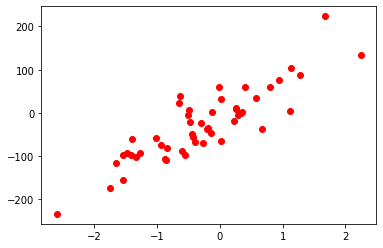

In [ ]:
# plot x and y

plt.scatter(X,y,c='red')
plt.show()

In [ ]:
# do train test split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=43)

X_train.shape,X_test.shape

y_train.shape,y_test.shape

((40,), (10,))

In [ ]:
# run linear regression

lr = LinearRegression()

lr.fit(X_train,y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print('the train score is',r2_score(y_train,y_pred_train))
print('the test score is',r2_score(y_test,y_pred_test))

the train score is 0.781788099907407
the test score is 0.5903900468968328


In [ ]:
lr.coef_,lr.intercept_

(array([82.56921208]), -2.9338002816879793)

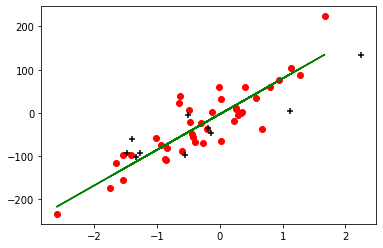

In [ ]:
# plot the regression line

plt.scatter(X_train,y_train,c='red')
plt.scatter(X_test,y_test,color='black',marker='+')
plt.plot(X_train,y_pred_train,color='green')
plt.show()

Simple Linear regression applied on the data after train test split.

In [ ]:
# run ridge regression

ridge = Ridge()

ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

print('the train score is',r2_score(y_train,y_pred_train))
print('the test score is',r2_score(y_test,y_pred_test))

the train score is 0.7810504666248563
the test score is 0.628274039867821


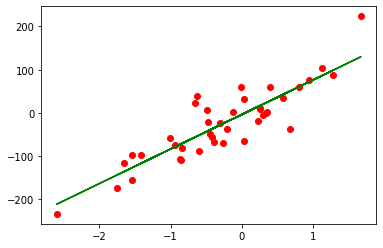

In [ ]:
# plot the regression line

plt.scatter(X_train,y_train,c='red')
plt.plot(X_train,y_pred_train,color='green')
plt.show()

In [ ]:
# plot regression line for different values of alpha

def ridge_reg(alphas):
    plt.scatter(X_train,y_train,c='red')
    plt.scatter(X_test,y_test,c='black',marker='x')
    for a in alphas:
        ridge = Ridge(alpha=a)

        ridge.fit(X_train,y_train)

        y_pred_train = ridge.predict(X_train)
        y_pred_test = ridge.predict(X_test)

        plt.plot(X_train,y_pred_train,label=f'Alpha {a}')
        print()
        print(f'the train score is for alpha {a} is',r2_score(y_train,y_pred_train))
        print(f'the test score is for alpha {a} is',r2_score(y_test,y_pred_test))
 

    plt.legend()   
    plt.show()


the train score is for alpha 0.1 is 0.7817802981778095
the test score is for alpha 0.1 is 0.5944538505387289

the train score is for alpha 1 is 0.7810504666248563
the test score is for alpha 1 is 0.628274039867821

the train score is for alpha 10 is 0.7365158395343927
the test score is for alpha 10 is 0.7898701476054619

the train score is for alpha 20 is 0.664136141848809
the test score is for alpha 20 is 0.801899320615926

the train score is for alpha 100 is 0.33006626563566255
the test score is for alpha 100 is 0.4598294304699181


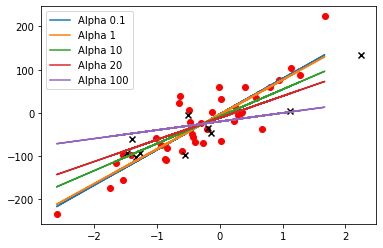

In [ ]:
alphas = [0.1,1,10,20,100]

ridge_reg(alphas)

The graph shows how the increasing value of alpha changes the slope of the line and makes it more horizontal.

This technique reduces overfitting and tries to generalize more on the test data.

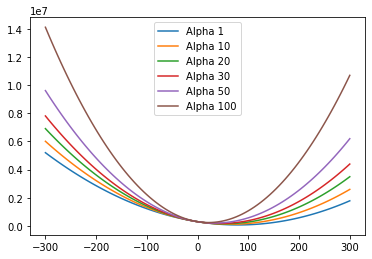

In [ ]:
# impact of alpha on loss function

def ridge_loss(m,alpha):
    y_pred = (m * X_train.ravel()) + b
    return np.sum((y_train - y_pred)**2) + alpha * (m**2)

b = -2.933

m = np.linspace(-300,300,100)
all_loss = []
alphas = [1,10,20,30,50,100]

for a in alphas:
    all_loss = []
    for coef in m:
        loss = ridge_loss(coef,a)
        all_loss.append(loss)
    
    plt.plot(m,all_loss,label=f'Alpha {a}')
plt.legend()
plt.show()

The value for the coefficient moves towards zero for the minimum loss when the alpha value is increased in the Ridge regression.

This graph shows that the value of slope/coefficient approaches near to zero when the value of alpha is increased. 

In [ ]:
# check for the different gradient values

X_new,y_new = make_regression(n_samples=500,n_features=10,n_informative=7,noise=30)

In [ ]:
# do train test split

X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,test_size=0.2,random_state=43)

X_train.shape,X_test.shape

y_train.shape,y_test.shape

((400,), (100,))

In [ ]:
# run linear regression

lr = LinearRegression()

lr.fit(X_train,y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print('the train score is',r2_score(y_train,y_pred_train))
print('the test score is',r2_score(y_test,y_pred_test))

the train score is 0.9447683042094392
the test score is 0.9213956068646703


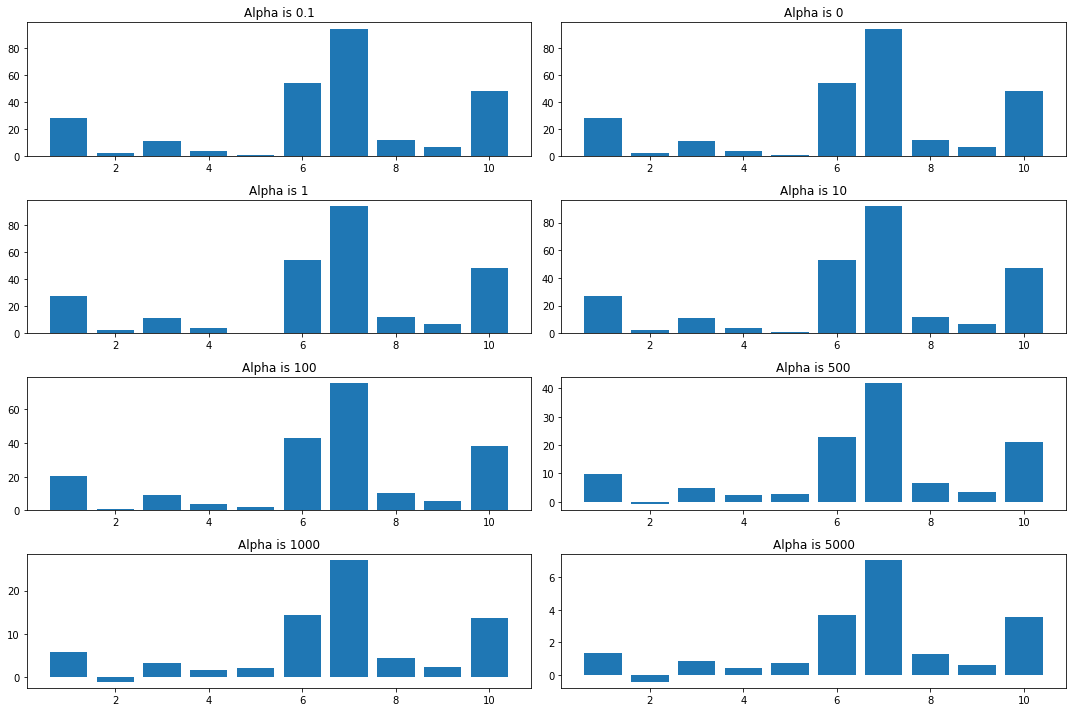

In [ ]:
# calculate the coefficients for different values of alphas

alphas = [0.1,0,1,10,100,500,1000,5000]

all_coef = []
i = 1

plt.figure(figsize=(15,10))
for a in alphas:
    new_ridge = Ridge(alpha=a)
    new_ridge.fit(X_train,y_train)

    coef = new_ridge.coef_.tolist()

    plt.subplot(4,2,i)
    plt.bar(np.arange(1,11,1),new_ridge.coef_)
    plt.title(f'Alpha is {a}')
    all_coef.append(coef)
    i = i+ 1
    plt.tight_layout()
df_coef = pd.DataFrame(all_coef,columns=np.arange(1,11,1),index=alphas)


The scale of the coeficients is changing and for the higher values of alpha the coefficients are reducing drastically and moving towards 0.

The coefficients reducing means the slope is getting more horizontal and the line is becoming more horizontal in nature.

In [ ]:
df_coef

,1,2,3,4,5,6,7,8,9,10
0.1,27.927043,2.222228,11.312453,3.839112,0.398666,54.413670,94.281848,11.653082,6.736096,48.437897
0.0,27.937149,2.224493,11.315290,3.838807,0.395993,54.428649,94.305699,11.654433,6.737291,48.450842
1.0,27.836406,2.201929,11.286983,3.841804,0.422590,54.279229,94.067734,11.640908,6.725360,48.321725
10.0,26.960234,2.006552,11.038365,3.863728,0.649448,52.970469,91.979880,11.518276,6.619303,47.191586
100.0,20.447452,0.631160,9.041700,3.781552,2.050902,42.676959,75.324787,10.294827,5.690671,38.334491
500.0,9.685090,-0.929472,5.004148,2.558705,2.784085,22.874882,41.889675,6.632544,3.450627,21.167807
1000.0,5.780369,-1.004949,3.210030,1.717301,2.256723,14.465140,26.984163,4.522827,2.308127,13.649766
5000.0,1.348655,-0.412517,0.829448,0.455925,0.748149,3.665505,7.026192,1.263385,0.633679,3.574534


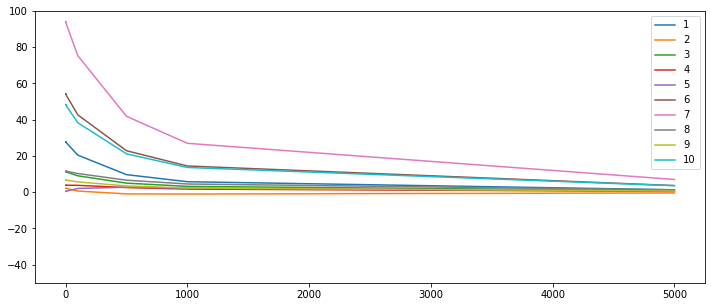

In [ ]:
df_coef.plot(figsize=(12,5))
plt.ylim(-50,100)
plt.legend(loc='upper right')
plt.show()

This graph shows how the larger coefficients are reducing and becoming 0 more rapidly as compared to coefficients that are already very small.

- Larger coefficients are affected majorly by increasing the alpha.
- This shows that regularization penalises steeper slopes / greater coefficients more.